<a href="https://colab.research.google.com/github/KomalVarma17/MachineLearning/blob/EmployeeAttritionClassificationAndFutureSalaryPrediction/EmployeeAttritionClassificationAndFutureSalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATASETS/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [2]:
df['Attrition']

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [3]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
df['Attrition'] = l.fit_transform(df['Attrition'])
df['Gender'] = l.fit_transform(df['Gender'])
df['Over18'] = l.fit_transform(df['Over18'])
df['OverTime'] = l.fit_transform(df['OverTime'])
df['BusinessTravel'] = l.fit_transform(df['BusinessTravel'])
df['Department'] = l.fit_transform(df['Department'])
df['EducationField'] = l.fit_transform(df['EducationField'])
df['JobRole'] = l.fit_transform(df['JobRole'])
df['MaritalStatus'] = l.fit_transform(df['MaritalStatus'])

In [4]:
df['Attrition'].value_counts()


,count
Attrition,
0,1233
1,237


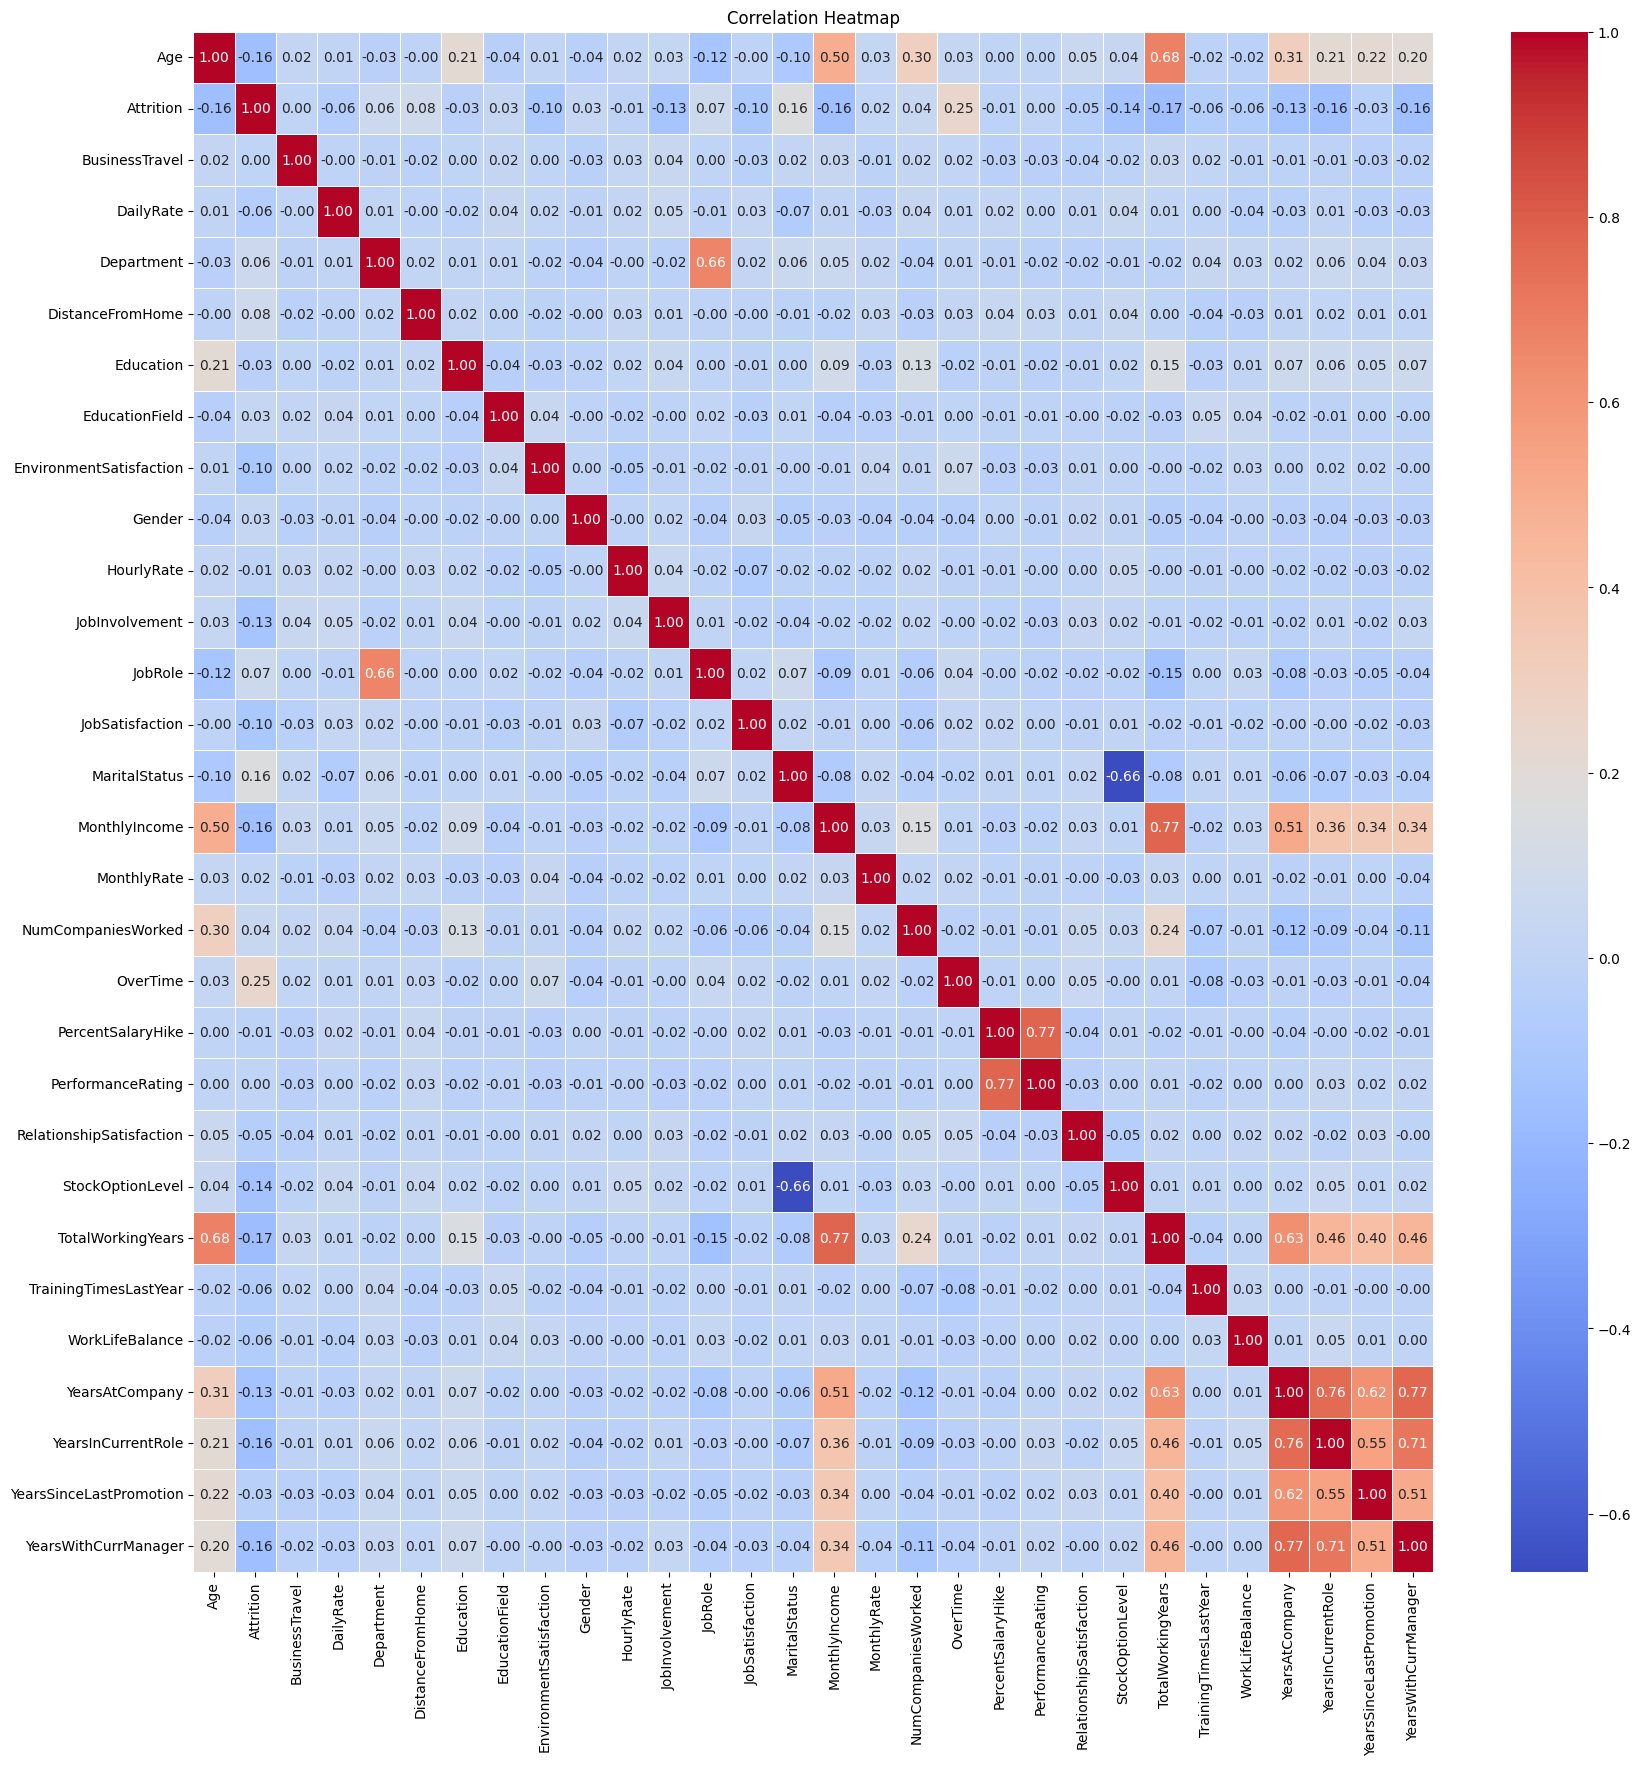

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()


plt.figure(figsize=(20, 20))  # Set size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


In [5]:
df.drop('EmployeeCount' , axis = 1 , inplace = True)#intution
df.drop('StandardHours' , axis = 1 , inplace = True)#intution
df.drop('EmployeeNumber' , axis = 1 , inplace = True)#intution
df.drop('Over18', axis=1, inplace=True)#intution
df.drop('JobLevel', axis=1, inplace=True) # due to high correlation between monthly income and job level


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

**Logistic Regression Classifier**

In [7]:
Xtrain = df.drop('Attrition', axis = 1)
Ytrain = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xtrain)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, Ytrain)

# 4. Split into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 5. Train Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight = 'balanced')
model.fit(X_train, y_train)

# 6. Predict and Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.757085020242915
Confusion Matrix:
 [[178  72]
 [ 48 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       250
           1       0.73      0.80      0.77       244

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.76       494
weighted avg       0.76      0.76      0.76       494



**Finding Best RF Model using GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy: 0.9249466812859409


**Random Forest Classifier**

gives same results as the best model found

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example
X = df.drop('Attrition', axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9311740890688259
Confusion Matrix:
 [[239  11]
 [ 23 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       250
           1       0.95      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



Feature Importances(OPTIONAL)

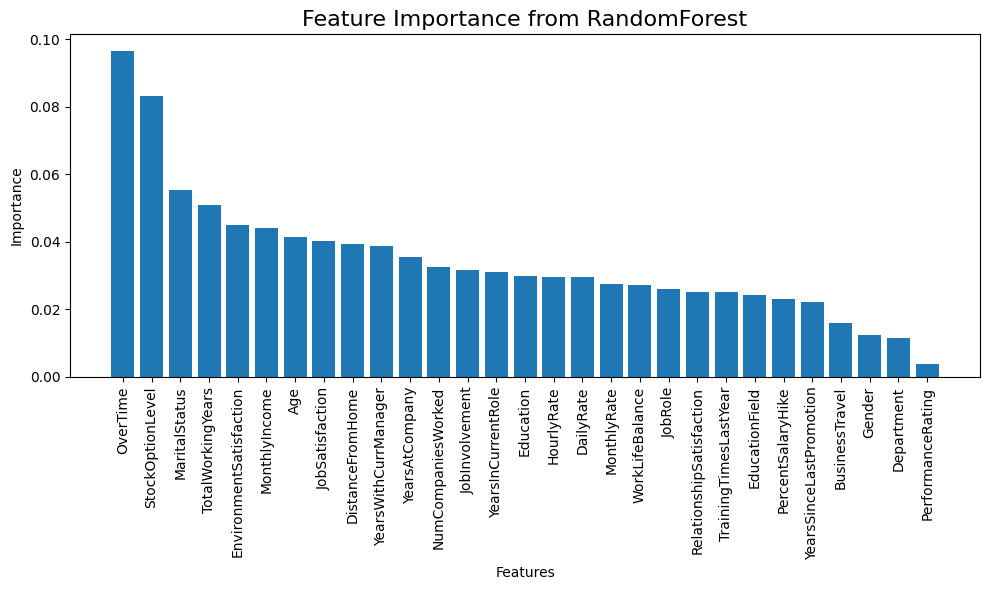

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_model' is your final trained RandomForest model
# and 'X_train' is your input features

# Get feature importances
importances = model1.feature_importances_
feature_names = X.columns  # assuming original feature names are in X

# Sort importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importance from RandomForest', fontsize=16)
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()



Comparision b/w RF and LR

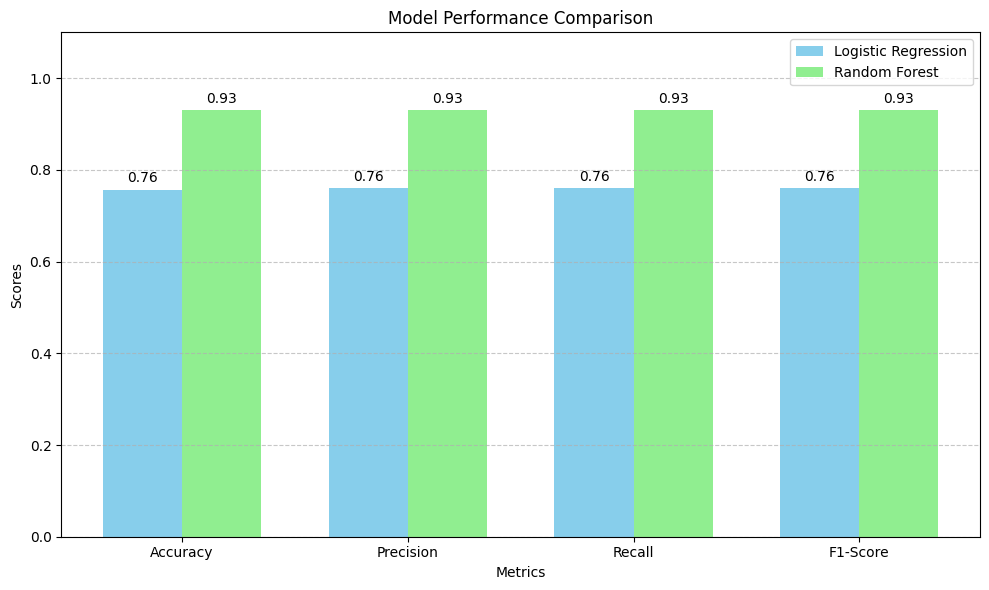

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Values for both models
logistic_scores = [0.7571, 0.76, 0.76, 0.76]
randomforest_scores = [0.9312, 0.93, 0.93, 0.93]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, logistic_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, randomforest_scores, width, label='Random Forest', color='lightgreen')

# Labels and titles
ax.set_ylabel('Scores')
ax.set_xlabel('Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Calculating Future Salaries**

In [10]:
df["Increment"] = df["PerformanceRating"].apply(lambda x: 1.10 if x == 4 else 1.05)
df['FutureSalary'] = df['MonthlyIncome'] * df['Increment']

In [11]:
df['FutureSalary']
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Increment,FutureSalary
0,41,1,2,1102,2,1,2,1,2,0,...,0,8,0,1,6,4,0,5,1.05,6292.65
1,49,0,1,279,1,8,1,1,3,1,...,1,10,3,3,10,7,1,7,1.10,5643.00
2,37,1,2,1373,1,2,2,4,4,1,...,0,7,3,3,0,0,0,0,1.05,2194.50
3,33,0,1,1392,1,3,4,1,4,0,...,0,8,3,3,8,7,3,0,1.05,3054.45
4,27,0,2,591,1,2,1,3,1,1,...,1,6,3,3,2,2,2,2,1.05,3641.40


**RandomeForestRegressor**


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Example
X1 = df.drop('FutureSalary', axis=1)
y1 = df['FutureSalary']


# Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Random Forest
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train1, y_train1)

# Predict and Evaluate
y_pred1 = model2.predict(X_test1)

# R² Score
r2 = r2_score(y_test1, y_pred1)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))

# MAPE
mape = mean_absolute_percentage_error(y_test1, y_pred1)

# 4. Print Results
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")



R² Score: 0.9994
Root Mean Squared Error (RMSE): 121.7933
Mean Absolute Percentage Error (MAPE): 0.0075


Training scores

In [13]:
# Predict on training data
y_train_pred = model2.predict(X_train1)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Training Metrics
r2_train = r2_score(y_train1, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train1, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train1, y_train_pred)

print(f"Training R²: {r2_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Training MAPE: {mape_train:.4f}")


Training R²: 0.9999
Training RMSE: 44.1057
Training MAPE: 0.0027


actual vs predicted (OPTIONAL)

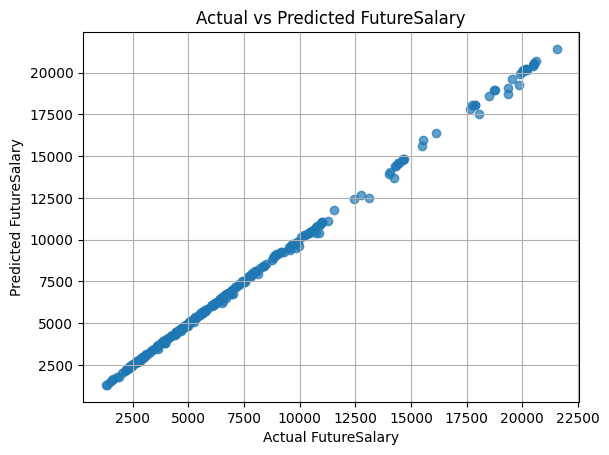

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test1, y_pred1, alpha=0.7)
plt.xlabel('Actual FutureSalary')
plt.ylabel('Predicted FutureSalary')
plt.title('Actual vs Predicted FutureSalary')
plt.grid(True)
plt.show()


Leaning Curve(OPTIONAL)

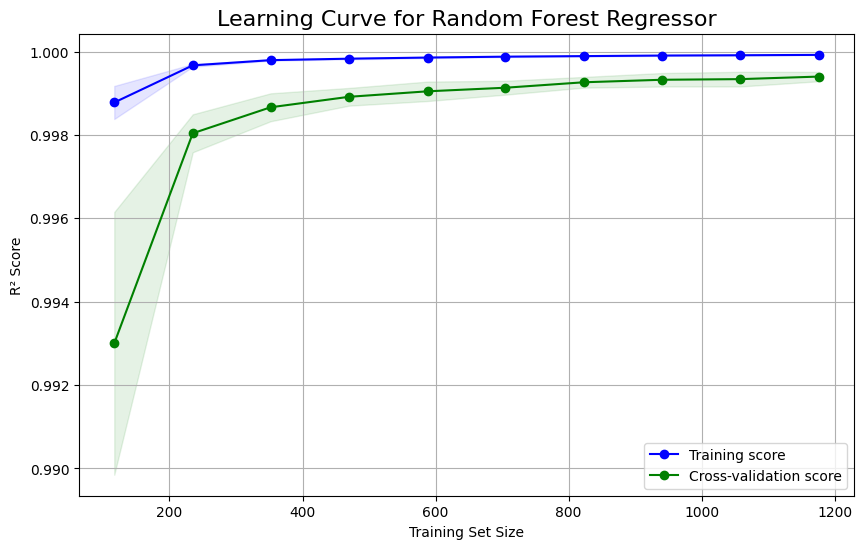

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X1,
    y1,
    cv=5,                 # 5-fold cross-validation
    scoring='r2',         # You can also use 'neg_mean_squared_error'
    n_jobs=-1,            # Use all CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 points from 10% to 100% of data
    shuffle=True,
    random_state=42
)

# Calculate mean and std deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

# Fill between +std and -std
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")

plt.title("Learning Curve for Random Forest Regressor", fontsize=16)
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


**RIDGE Regressor**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge

X2 = df.drop('FutureSalary', axis=1)
y2 = df['FutureSalary']



# Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Random Forest
model3 = Ridge(alpha =1.0, random_state=42)
model3.fit(X_train2, y_train2)

# Predict and Evaluate
y_pred2 = model3.predict(X_test2)

# R² Score
r21 = r2_score(y_test2, y_pred2)

# RMSE
rmse1 = np.sqrt(mean_squared_error(y_test2, y_pred2))

# MAPE
mape1 = mean_absolute_percentage_error(y_test2, y_pred2)

# 4. Print Results
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")



R² Score: 0.9994
Root Mean Squared Error (RMSE): 121.7933
Mean Absolute Percentage Error (MAPE): 0.0075


Training scores

In [15]:
# Predict correctly
y_train_pred1 = model3.predict(X_train2)

# Evaluate on the correct y_train1
r2_train1 = r2_score(y_train2, y_train_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train2, y_train_pred1))
mape_train1 = mean_absolute_percentage_error(y_train2, y_train_pred1)

print(f"Training R²: {r2_train1:.4f}")
print(f"Training RMSE: {rmse_train1:.4f}")
print(f"Training MAPE: {mape_train1:.4f}")


Training R²: 0.9997
Training RMSE: 83.4744
Training MAPE: 0.0101


**Classifying** **Emoplyee's**: **Stay/Leave**

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example
X = df.drop('Attrition', axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9311740890688259
Confusion Matrix:
 [[239  11]
 [ 23 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       250
           1       0.95      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [16]:
probs = model1.predict_proba(X_scaled)# shape: (n_samples, 2)

# Get P_stay for each employee
P_leave = probs[:, 1]
P_stay = 1 - P_leave

# Define threshold
threshold = 0.5

# Create an empty list to store each prediction
predictions = []

# Loop correctly
for p in P_stay:
    if p >= threshold:
        predictions.append('Likely to Stay')
    else:
        predictions.append('Likely to Leave')

# Add to your DataFrame
df['P_leave'] = P_leave
df['P_stay'] = P_stay
df['AttritionPrediction'] = predictions

# View
print(df[['P_stay', 'AttritionPrediction']].head())

   P_stay AttritionPrediction
0    0.14     Likely to Leave
1    0.96      Likely to Stay
2    0.12     Likely to Leave
3    0.84      Likely to Stay
4    0.84      Likely to Stay


In [17]:
df['AttritionPrediction'].value_counts()


,count
AttritionPrediction,
Likely to Stay,1241
Likely to Leave,229


TOTAL EXPECTED LOSS FROM ALL EMPLOYEE's

In [18]:
expectedloss = df['P_leave'] * df['FutureSalary']

total = np.sum(expectedloss)
print(total)

1749177.31


**Loss FROM Emplyee's who are likely going to stay**

In [19]:
total_expected_loss = 0

for i in range(len(df)):
    if df['AttritionPrediction'][i] == 'Likely to Stay':
        expected_loss = df['P_leave'][i] * df['FutureSalary'][i]
        total_expected_loss += expected_loss

print(f"Total Expected Loss (for Likely to Stay employees): {total_expected_loss:.2f}")


Total Expected Loss (for Likely to Stay employees): 860099.00
